<a href="https://colab.research.google.com/github/kishorpatil03/Bike-Sharing-Demand-Prediction---Supervised-ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_Supervised_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

# ***By Kishor Patil***

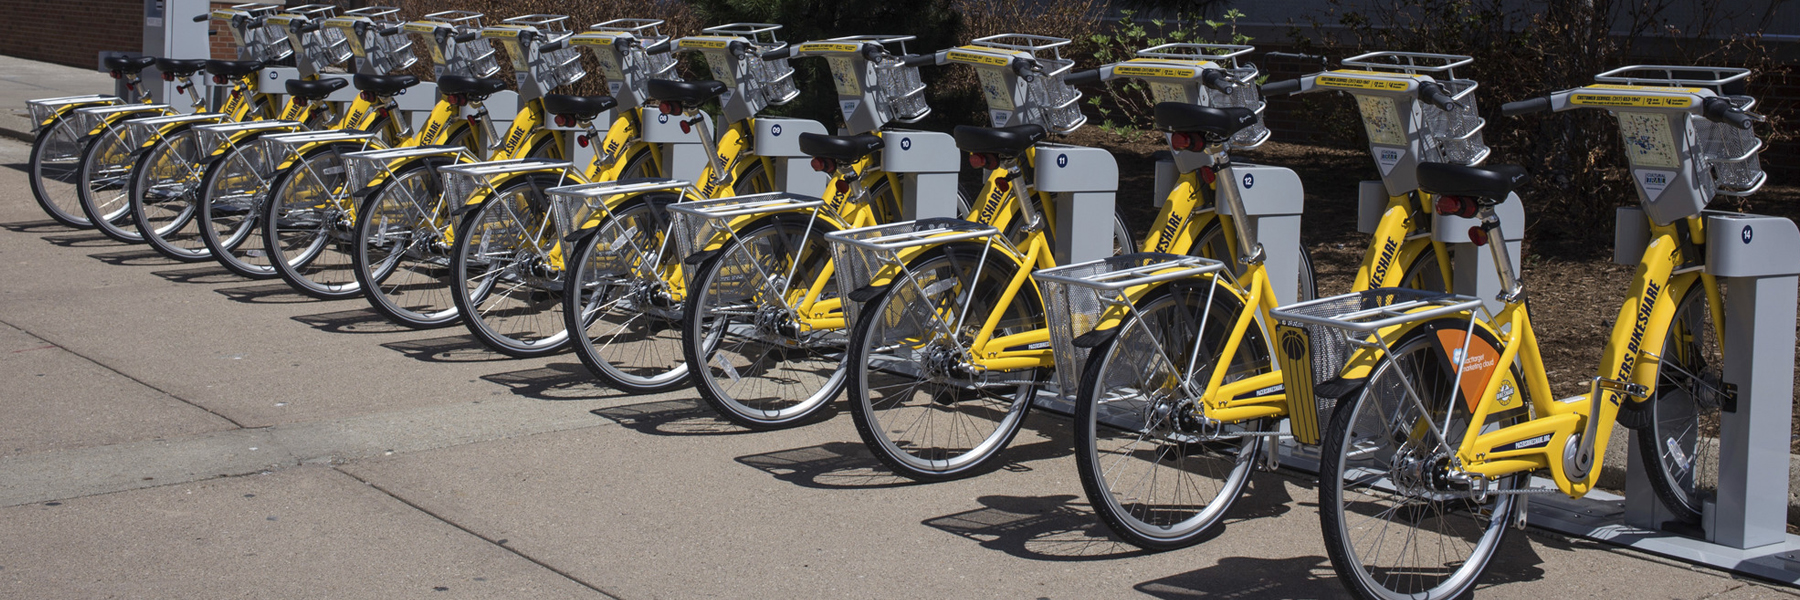

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

## **Importing Important Libraries and Dataset**

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding = 'latin',parse_dates=['Date'])

In [65]:
# Checking top 5 records in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [66]:
# Checking shape of dataframe
df.shape

(8760, 14)

In [67]:
# Lets Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [68]:
# Renaming Columns for our convinience
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [69]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [70]:
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   bike_count       8760 non-null   int64         
 2   hour             8760 non-null   int64         
 3   temp             8760 non-null   float64       
 4   humidity         8760 non-null   int64         
 5   wind             8760 non-null   float64       
 6   visibility       8760 non-null   int64         
 7   dew_temp         8760 non-null   float64       
 8   sunlight         8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  season           8760 non-null   object        
 12  holiday          8760 non-null   object        
 13  functioning_day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [72]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
sunlight,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


In [73]:
# Lets Check Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [74]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


# **Exploratory Data Analysis**

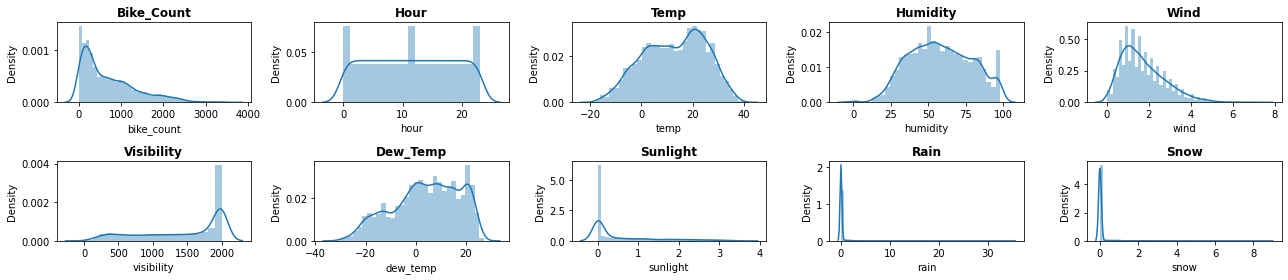

In [75]:
# Lets Visualize Distributions of our Features
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**Lets Check for any outliers**

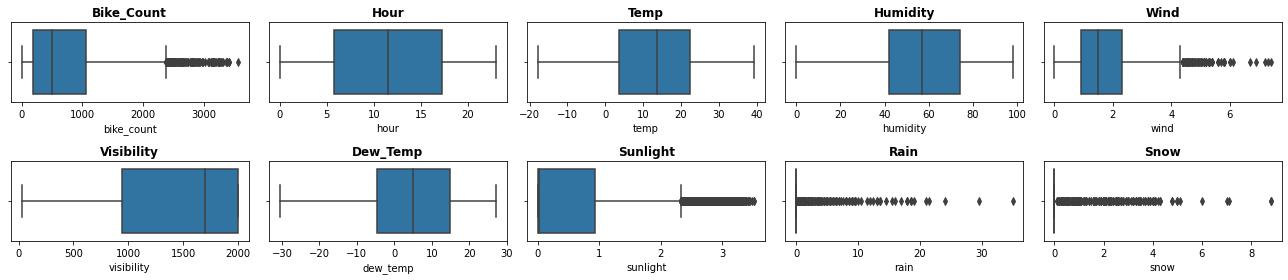

In [76]:
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**Important Thing is that We have so many outliers in our Dependent Variable "Bike_Count", So Lets Remove outliers by Using IQR method**

In [77]:
q1, q3, median = df.bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['bike_count'] = np.where(df['bike_count'] > upper_limit, median,np.where(
                            df['bike_count'] < lower_limit,median,df['bike_count']))

# Removing outliers by Capping:
for col in ['wind','sunlight','rain','snow']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

**Lets See after Removing Outliers How our Boxplot looks**

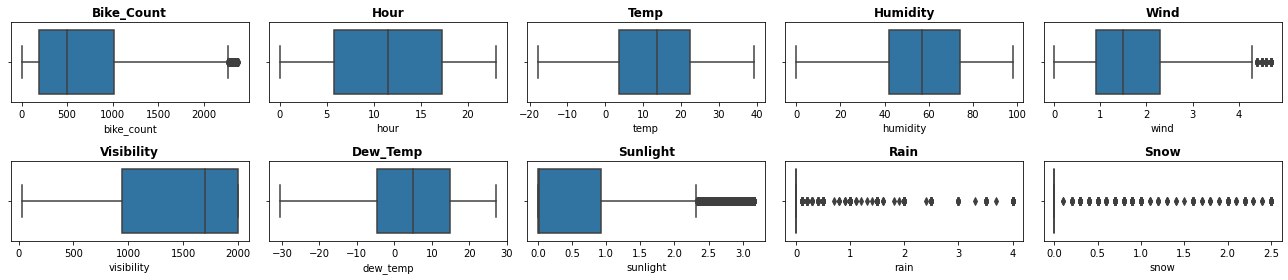

In [78]:
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **Dataset Manipulation & Cleaning**

By Observing Dataset Lets create some new features from **"date"** and **"hour"** column

In [79]:
df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [80]:
# Dropping the Date column
df.drop(columns=['date'], inplace = True)

In [81]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['season', 'holiday', 'functioning_day', 'timeshift']

In [82]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64 

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 

Yes    8465
No      295
Name: functioning_day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



**Based on above data lets Define a label encoder**

In [83]:
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [84]:
# Label Encoding
df = df.replace(encoder)

In [85]:
# One Hot Encoding
df = pd.get_dummies(df, columns=["season"], prefix='', prefix_sep='')

In [86]:
# Lets see how our Updated Dataset looks
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,weekend,timeshift,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


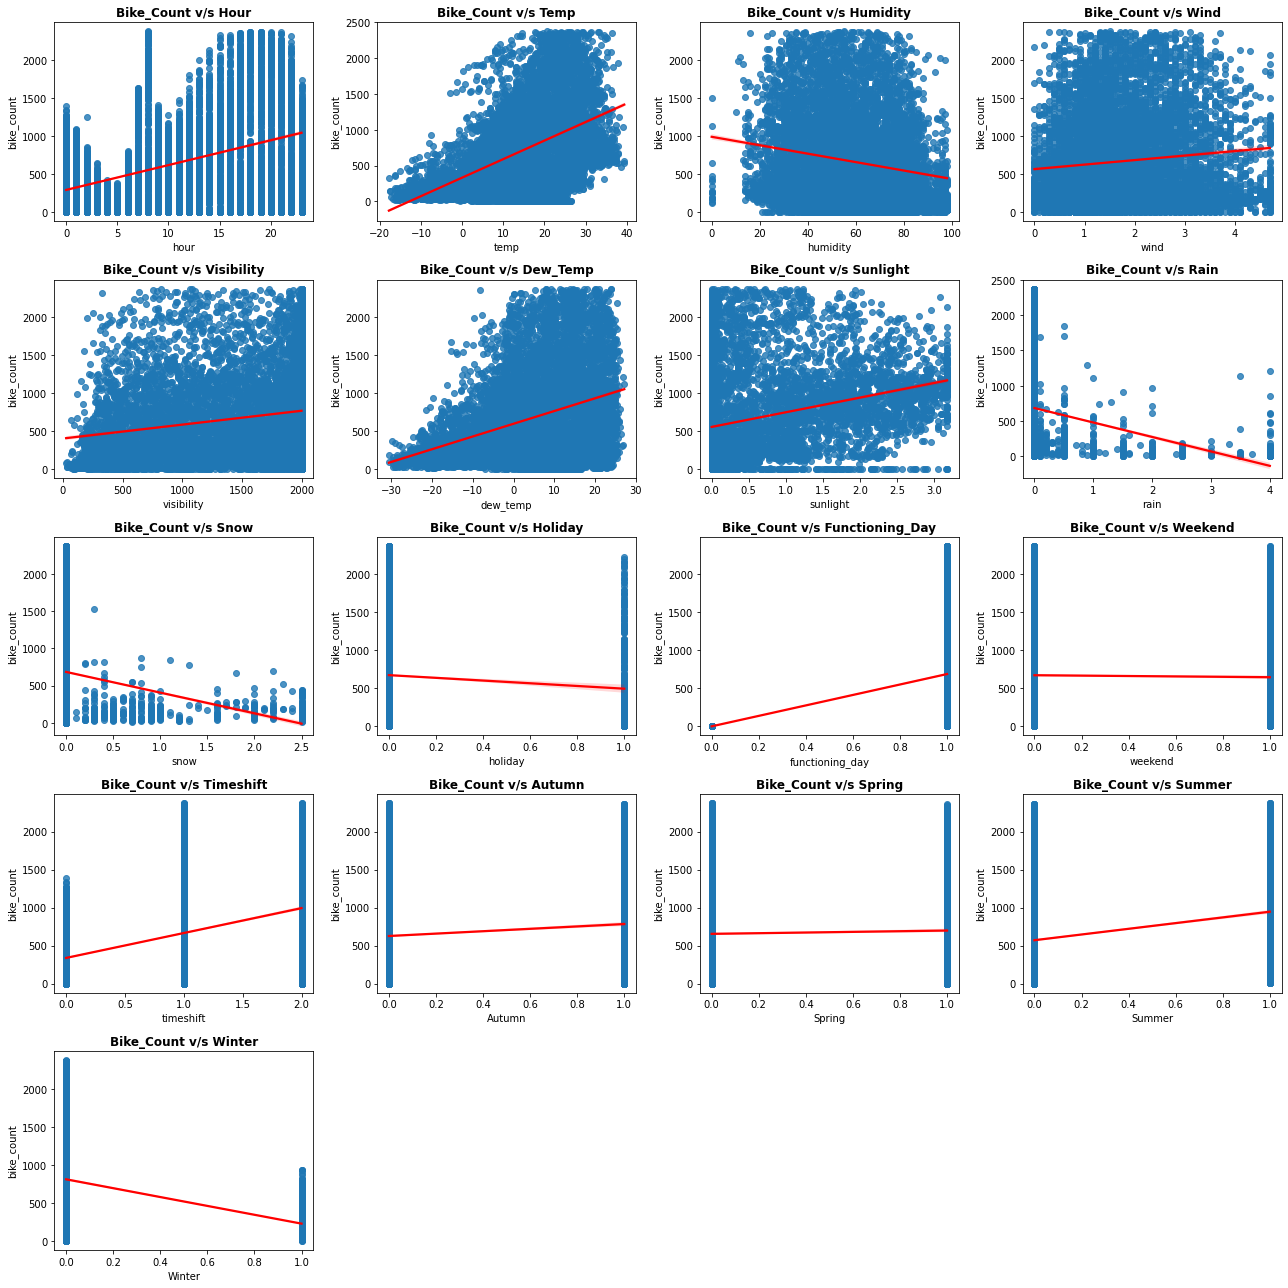

In [87]:
independent_variables = [i for i in df.columns if i not in ['bike_count']]

# Checking Linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

Now lets check skewness of our dependend variable **Bike_Count**

In [88]:
print(f'Skewness of original data : {df.bike_count.skew()}')
print(f'Skewness after log transformation : {np.log(df.bike_count).skew()}')
print(f'Skewness after transformation : {np.sqrt(df.bike_count).skew()}')

Skewness of original data : 0.983470199089409
Skewness after log transformation : nan
Skewness after transformation : 0.153123685071092


**Sqrt Transformation gives skewness 0.15 indicates that the distribution is fairly symmetrical.**

**So By Using Distribution Plot lets see how our Transformation looks**

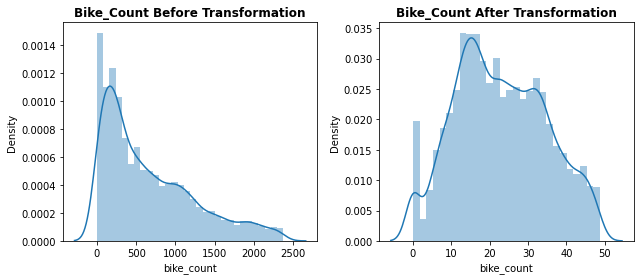

In [89]:
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

# **Lets Treat Multicolinearity**

In [91]:
# Defining a function to calculate Variable Inflation factor(VIF)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

**VIF (Variable Inflation Factor)** - Its determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

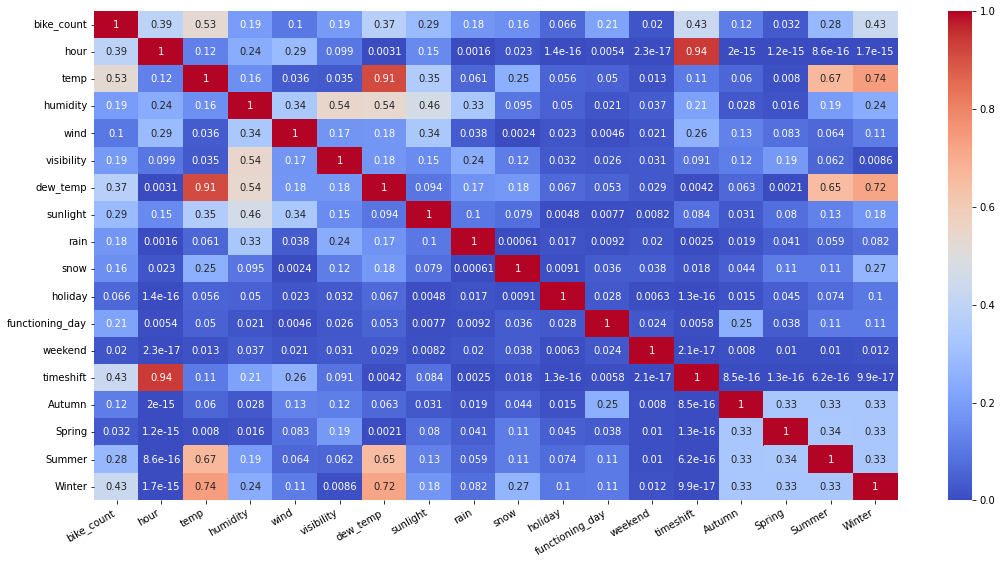

In [92]:
# Lets check corelations using Heatmap
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

By Observing Heatmap, We can see some highly correlated features.

Lets treat them by excluding them from dataset and checking the variable inflation factor.

In [93]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['bike_count']]
calc_vif(df[independent_variables])

,variables,VIF
0,dew_temp,119.298136
1,Summer,116.141121
2,Spring,112.673201
3,Autumn,110.725563
4,Winter,107.844468
5,temp,90.833188
6,humidity,21.238433
7,hour,8.781649
8,timeshift,8.555039
9,sunlight,2.078721


**Summer** and **Winter** are highly correlated with **temperature**. Hence Even if we drop these features the useful information will not be lost.

In [94]:
independent_variables = [i for i in df.columns if i not in ['bike_count','Winter','Summer','dew_temp','hour','humidity']]
calc_vif(df[independent_variables])

,variables,VIF
0,functioning_day,8.973136
1,visibility,6.903425
2,wind,4.784533
3,timeshift,2.956516
4,temp,2.685255
5,sunlight,1.944365
6,Spring,1.528702
7,Autumn,1.468795
8,weekend,1.396051
9,snow,1.131983


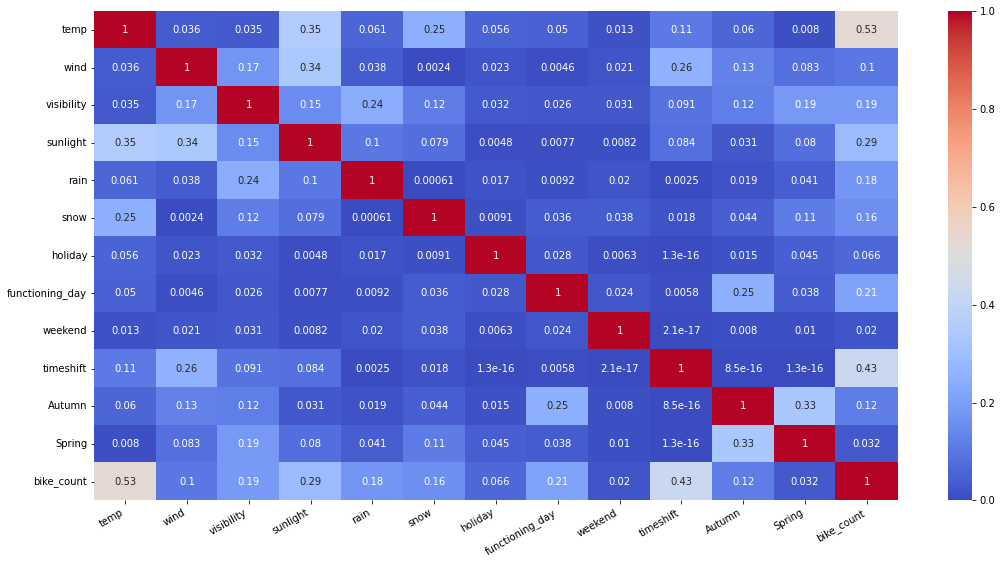

In [95]:
# Updating the dataset
dataset = df[independent_variables + ['bike_count']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

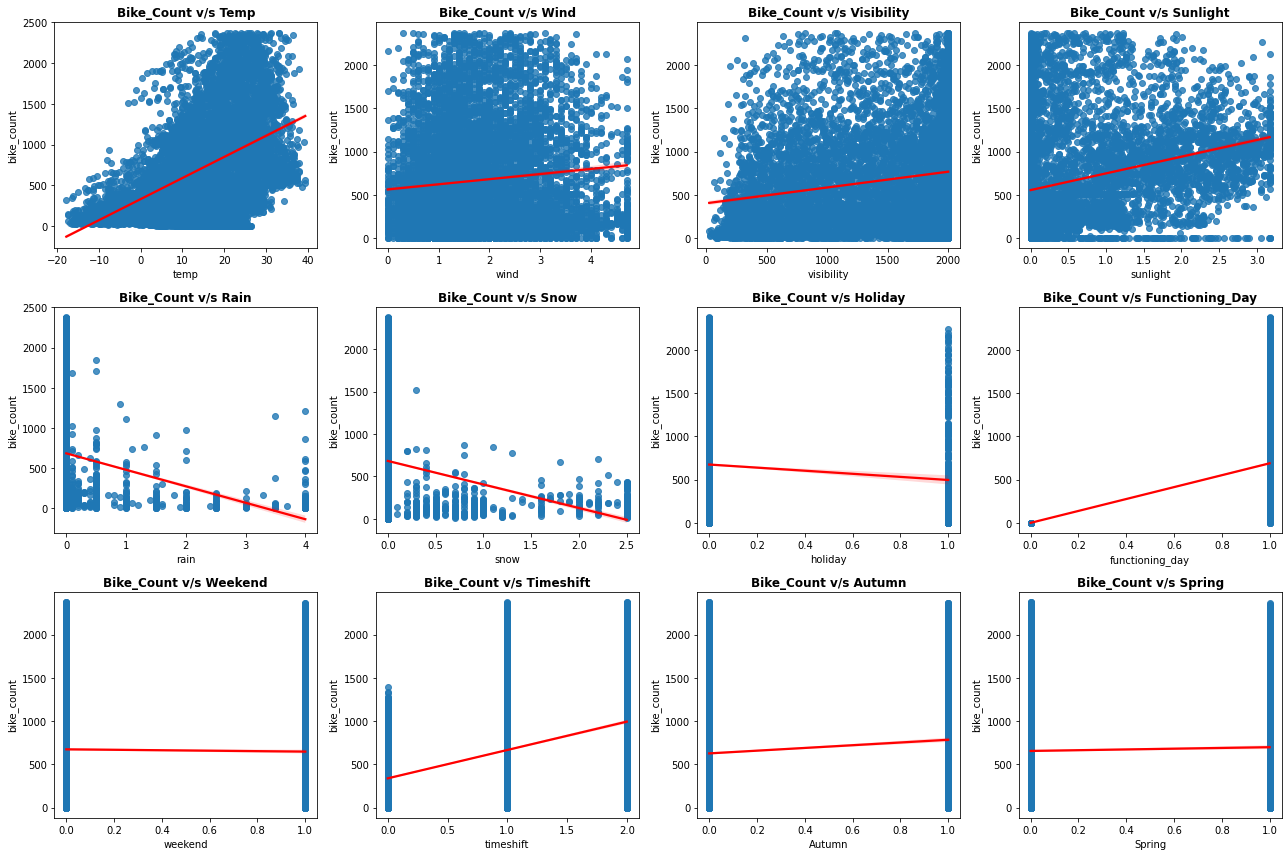

In [96]:
# Checking Linearity of the new dataset
plt.figure(figsize=(18,12))
for n,column in enumerate(independent_variables):
  plt.subplot(3, 4, n+1)
  sns.regplot(data = dataset, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [97]:
# Lets Check Our Cleaned Dataset
dataset.head()

,temp,wind,visibility,sunlight,rain,snow,holiday,functioning_day,weekend,timeshift,Autumn,Spring,bike_count
0,-5.2,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,0,254.0
1,-5.5,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,204.0
2,-6.0,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,173.0
3,-6.2,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,0,107.0
4,-6.0,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,78.0
